# Introduction
Protein interaction data plays a crucial role in comprehending the intricate relationships between gene-encoded biomolecules, enabling us to gain insight into cellular function and predict therapeutic possibilities. Understanding the structure and function of these interaction networks is essential for advancing our knowledge of complex biological systems. PPINs are complex and highly interconnected, with thousands of nodes and edges. Understanding the structure and function of PPINs is a challenging task due to their complexity. Centrality measures can be used to identify the most important nodes in a PPIN and provide insights into network structure and function.The Protein-Protein Interaction Network Bipartite Centrality Analysis using NetworkX Notebook aims to analyze and visualize protein-protein interaction networks using bipartite centrality measures.
Several databases store protein interaction data, with STRING being one of the most prominent. At present, STRING encompasses over 3.1 billion interactions, involving 20 million proteins across 5,000 organisms, thereby offering a comprehensive resource for exploring protein-protein interactions. We will work on selected human proteins.
Centrality measures are quantitative measures that capture different aspects of network structure and importance. The most commonly used centrality measures are degree centrality, betweenness centrality, closeness centrality, and eigenvector centrality. Each of these measures provides different insights into network structure and can be used to identify different types of important nodes.This analysis provides insight into the network structure and helps to identify key players in protein-protein interaction networks. You can find more measures provided by NetworkX here :- https://networkx.org/documentation/latest/reference/algorithms/centrality.html
NetworkX is a popular Python library for network analysis and visualization, offering a range of algorithms and tools for exploring complex networks. The notebook employs NetworkX to construct and analyze protein-protein interaction networks, which are represented as graphs with nodes representing proteins and edges representing interactions between them.

# Importing the required libraries and packages 

In [1]:
import networkx as nx
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

## About the Dataset
The STRING database is a biological database and web resource of known and predicted protein interactions, including both direct physical interactions and indirect functional associations. The interactions are derived from multiple sources, including high-throughput experiments, co-expression analysis, and text mining of the scientific literature. The database covers a wide range of organisms, including bacteria, archaea, and eukaryotes.
The STRING database provides users with several tools for visualizing and analyzing protein interaction networks. Users can search for individual proteins and view their known interactions, or upload their own list of proteins to generate a custom interaction network. The database also provides tools for analyzing the functional enrichment of proteins in a network, predicting protein interactions based on sequence similarity, and comparing different protein networks.
Dataset Source :- https://string-db.org/cgi/about?footer_active_subpage=references

# Fetching the Dataset
We will use the STRING database API to retrieve a protein interaction network for a list of human proteins. This code uses the STRING database API to retrieve a protein interaction network for a list of human proteins.We make a list of human protein names.We use the join() method to combine the protein names into a string separated by %0d (a URL-encoded newline character). The resulting string is stored in the proteins variable. A URL is constructed using the proteins string and a species identifier for human (9606). The requests module is used to send a GET request to the URL, and the response is stored in the r variable. The list of proteins was selected from a larger set of human proteins related to serotonin. 9606 is the species number for humans. You can checkout more methods to fetch data from String database here :- https://string-db.org/cgi/help?sessionId=bbzQfhU4eZmR


In [2]:
# Define a list of protein IDs to query the STRING database
protein_list = ['TPH1','COMT','SLC18A2','HTR1B','HTR2C','HTR2A','MAOA',
            'TPH2','HTR1A','HTR7','SLC6A4','GABBR2','POMC','GNAI3',
            'NPY','ADCY1','PDYN','GRM2','GRM3','GABBR1']
proteins = '%0d'.join(protein_list) # Concatenate the protein IDs into a single string using the '%0d' separator
url = 'https://string-db.org/api/tsv/network?identifiers=' + proteins + '&species=9606' # Construct the URL for the STRING database API endpoint, specifying the protein IDs and species code
r = requests.get(url)

In [3]:
lines = r.text.split('\n') # pull the text from the response object and split based on new lines
data = [l.split('\t') for l in lines] # split each line into its components based on tabs
# convert to dataframe using the first row as the column names; drop empty, final row
df = pd.DataFrame(data[1:-1], columns = data[0]) # Send a GET request to the API endpoint and store the response in a variable

In [4]:
df.head(n=10)

,stringId_A,stringId_B,preferredName_A,preferredName_B,ncbiTaxonId,score,nscore,fscore,pscore,ascore,escore,dscore,tscore
0,9606.ENSP00000250018,9606.ENSP00000378492,TPH1,GRM2,9606,0.411,0,0,0,0.063,0,0,0.398
1,9606.ENSP00000250018,9606.ENSP00000378492,TPH1,GRM2,9606,0.411,0,0,0,0.063,0,0,0.398
2,9606.ENSP00000250018,9606.ENSP00000384092,TPH1,POMC,9606,0.439,0,0,0,0.062,0,0,0.427
3,9606.ENSP00000250018,9606.ENSP00000384092,TPH1,POMC,9606,0.439,0,0,0,0.062,0,0,0.427
4,9606.ENSP00000250018,9606.ENSP00000384364,TPH1,NPY,9606,0.458,0,0,0,0,0,0,0.458
5,9606.ENSP00000250018,9606.ENSP00000384364,TPH1,NPY,9606,0.458,0,0,0,0,0,0,0.458
6,9606.ENSP00000250018,9606.ENSP00000354511,TPH1,COMT,9606,0.684,0,0,0,0.052,0,0,0.681
7,9606.ENSP00000250018,9606.ENSP00000354511,TPH1,COMT,9606,0.684,0,0,0,0.052,0,0,0.681
8,9606.ENSP00000250018,9606.ENSP00000358963,TPH1,HTR1B,9606,0.716,0,0,0,0,0,0,0.716
9,9606.ENSP00000250018,9606.ENSP00000358963,TPH1,HTR1B,9606,0.716,0,0,0,0,0,0,0.716


In [5]:
# dataframe with the preferred names of the two proteins and the score of the interaction
interactions = df[['preferredName_A', 'preferredName_B', 'score']] 

In [6]:
interactions[:10] 

,preferredName_A,preferredName_B,score
0,TPH1,GRM2,0.411
1,TPH1,GRM2,0.411
2,TPH1,POMC,0.439
3,TPH1,POMC,0.439
4,TPH1,NPY,0.458
5,TPH1,NPY,0.458
6,TPH1,COMT,0.684
7,TPH1,COMT,0.684
8,TPH1,HTR1B,0.716
9,TPH1,HTR1B,0.716


# Construction of Graph using NetworkX
Now we will construct a protein interaction graph using the NetworkX library.We create a new empty graph G is created using the NetworkX Graph class, with a name attribute set to 'Protein Interaction Graph'.
The code iterates through each row of the interactions array. For each row, it extracts the two proteins involved in the interaction (a and b) and the weight of the interaction (w). The weight is stored as a float, and represents the strength of the interaction, with higher scores indicating weaker interactions.
Overall, this code constructs a protein interaction graph using the NetworkX library, where nodes represent proteins and edges represent interactions between proteins. The edges are weighted based on the strength of the interaction, with higher weights indicating weaker interactions.





In [7]:
G=nx.Graph(name='Protein Interaction Graph')
interactions = np.array(interactions)
for i in range(len(interactions)):
    interaction = interactions[i]
    a = interaction[0] # protein a node which will be preferredName_A
    b = interaction[1] # protein b node which will be preferredName_B
    w = float(interaction[2]) # score as weighted edge where high scores = low weight
    G.add_weighted_edges_from([(a,b,w)]) # add weighted edge to graph

In [8]:
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())

Number of nodes: 20
Number of edges: 102


# Visualizing Network

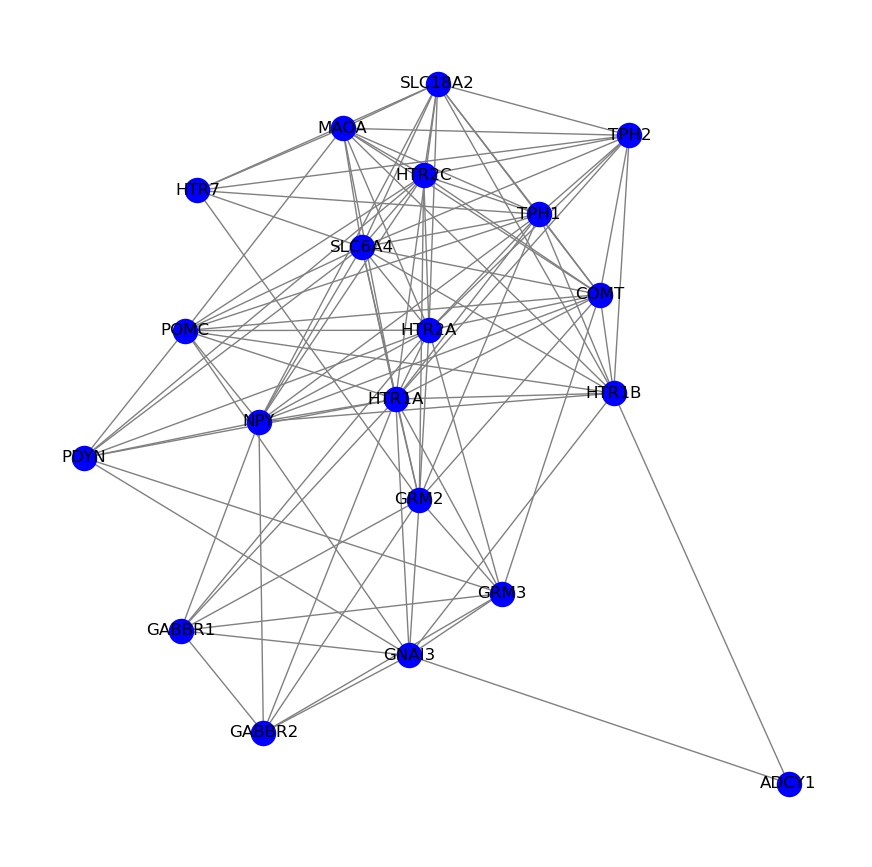

In [9]:
pos = nx.spring_layout(G) # position the nodes using the spring layout
plt.figure(figsize=(11, 11), facecolor='white')
nx.draw_networkx(G, node_color='blue', edge_color='grey')
plt.axis('off')
plt.show()

# Finding Centrality Measures for the Protein-Protein Network
Finding centrality measures for a protein-protein interaction (PPI) network dataset can give various insights on the protein-protein network.
1) Identifying highly connected nodes: Centrality measures can help identify highly connected nodes in the PPI network, which are often key regulators or hubs of the network. 

2) Predicting essential genes: We can identify essential genes in the PPI network, which are genes whose deletion or knockout would result in a lethal phenotype. Highly central genes are often essential genes, as they are required for maintaining the integrity of the network.

3) Identifying disease-associated genes: Centrality measures can help identify genes that are associated with disease or other phenotypic traits. Disease-associated genes are often highly central in PPI networks, as they are involved in key pathways or processes that are disrupted in disease.

4) Identifying important proteins: Centrality measures can be used to identify proteins that are most important in a PPI network. For example, proteins with high degree centrality are likely to be involved in many interactions and may play important roles in regulating cellular processes. Identifying these important proteins can help researchers better understand the underlying biology of a system.

5) Characterizing network structure: Centrality measures can also be used to characterize the overall structure of a PPI network. For example, networks with high clustering coefficient and low betweenness centrality are indicative of modular networks, where proteins tend to interact within well-defined modules. Understanding the network structure can provide insights into the functional organization of a biological system.

Overall, finding centrality measures for a PPI network dataset can provide valuable insights into the organization and function of the network, as well as its role in disease and other biological processes. These insights can help guide future research and drug development efforts.

# Degree Centrality 
The degree centrality for a node v is the fraction of nodes it is connected to. We find the degree centrality of our network to identify the most connected nodes.

In [10]:
dc=nx.degree_centrality(G)
dc

{'TPH1': 0.6842105263157894,
 'GRM2': 0.5789473684210527,
 'POMC': 0.5789473684210527,
 'NPY': 0.631578947368421,
 'COMT': 0.6842105263157894,
 'HTR1B': 0.5789473684210527,
 'SLC18A2': 0.5789473684210527,
 'HTR7': 0.3157894736842105,
 'HTR2C': 0.5789473684210527,
 'HTR2A': 0.7368421052631579,
 'TPH2': 0.5263157894736842,
 'MAOA': 0.5789473684210527,
 'HTR1A': 0.8421052631578947,
 'SLC6A4': 0.7368421052631579,
 'GABBR2': 0.3157894736842105,
 'GRM3': 0.42105263157894735,
 'GNAI3': 0.47368421052631576,
 'GABBR1': 0.3684210526315789,
 'PDYN': 0.42105263157894735,
 'ADCY1': 0.10526315789473684}

## Visualization of Degree Centrality 
The nodes with higher degree centrality are colored with warmer colors (e.g., red), while nodes with lower degree centrality are colored with cooler colors (e.g., blue). We can observe that the visualization correlates with the conclusions drawn above.

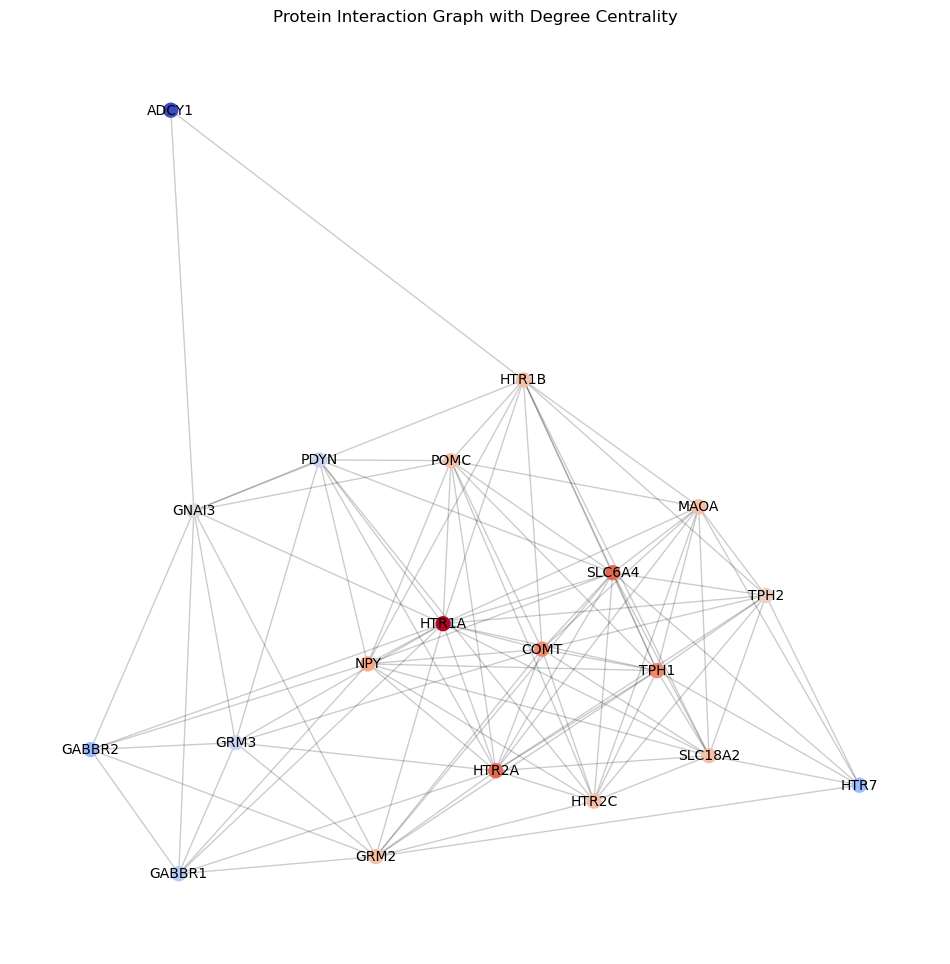

In [11]:
# Create a list of node colors based on their Degree centrality
colors = [dc[node] for node in G.nodes()]

# Draw the graph using spring layout and node colors based on their Degree centrality
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, k=0.5, iterations=50)
nx.draw_networkx_edges(G, pos, alpha=0.2)
nx.draw_networkx_nodes(G, pos, node_size=100, node_color=colors, cmap='coolwarm')
nx.draw_networkx_labels(G, pos, font_size=10, font_family='sans-serif')
plt.axis('off')
plt.title('Protein Interaction Graph with Degree Centrality')
plt.show()


## Results
From the above calculations we can infer that HTR1A, HTR2A, and SLC6A4 have the highest degree centrality, indicating that they are highly connected to other proteins in the network and are likely to be important hubs in the network, and their disruption may have significant effects on the overall network structure and function.'HTR7','TPH2','ADCY1' have the lowest degree centrality indicating that they aren't well connected to the network. 
# Eigen Vector Centrality
Eigenvector centrality measures the influence of a node in the network based on the connections it has to other highly connected nodes in the network. The higher the eigenvector centrality of a node, the more influential it is in the network.

In [12]:
ec = nx.eigenvector_centrality(G)

In [13]:
sorted((v, f"{c:0.2f}") for v, c in ec.items())

[('ADCY1', '0.03'),
 ('COMT', '0.29'),
 ('GABBR1', '0.13'),
 ('GABBR2', '0.10'),
 ('GNAI3', '0.14'),
 ('GRM2', '0.21'),
 ('GRM3', '0.14'),
 ('HTR1A', '0.31'),
 ('HTR1B', '0.23'),
 ('HTR2A', '0.29'),
 ('HTR2C', '0.24'),
 ('HTR7', '0.13'),
 ('MAOA', '0.25'),
 ('NPY', '0.25'),
 ('PDYN', '0.17'),
 ('POMC', '0.24'),
 ('SLC18A2', '0.25'),
 ('SLC6A4', '0.30'),
 ('TPH1', '0.28'),
 ('TPH2', '0.23')]

## Lets Visualize using Eigenvector Centrality
The nodes with higher eigenvector centrality are colored with warmer colors (e.g., red), while nodes with lower eigenvector centrality are colored with cooler colors (e.g., blue).  We can observe that the visualization correlates with the conclusions drawn above.

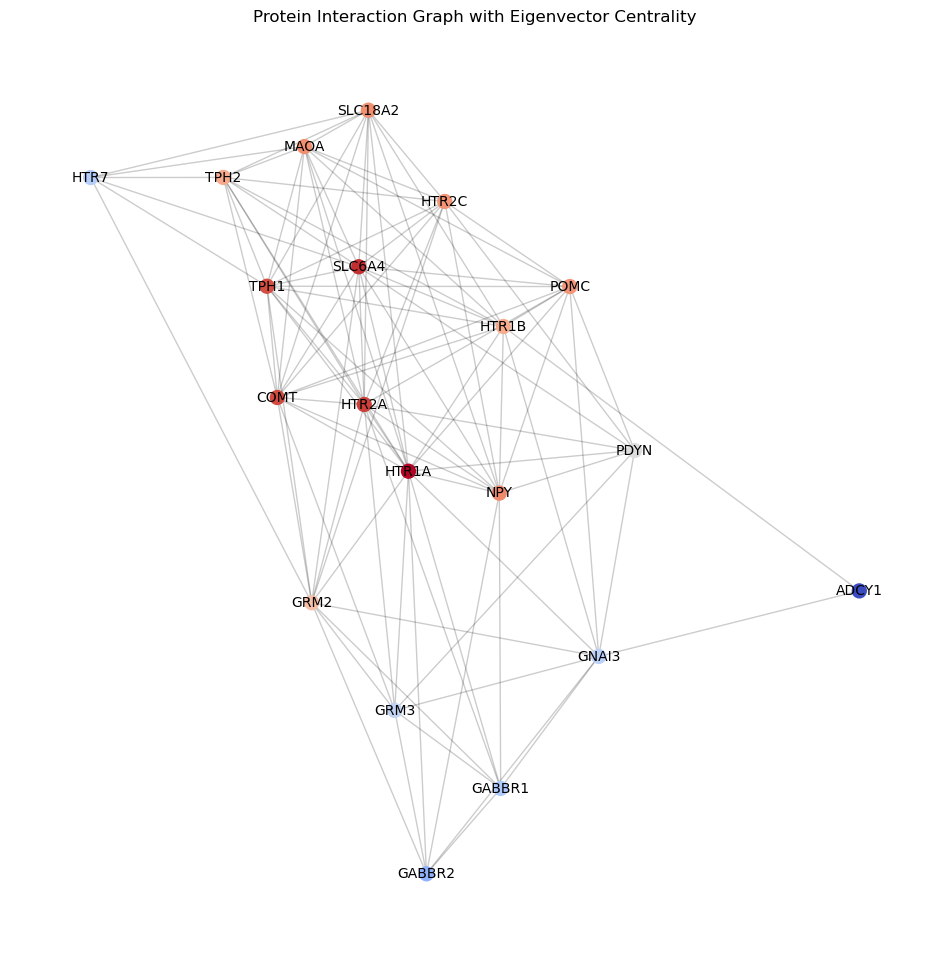

In [14]:
# Create a list of node colors based on their eigenvector centrality
colors = [ec[node] for node in G.nodes()]

# Draw the graph using spring layout and node colors based on their eigenvector centrality
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, k=0.5, iterations=50)
nx.draw_networkx_edges(G, pos, alpha=0.2)
nx.draw_networkx_nodes(G, pos, node_size=100, node_color=colors, cmap='coolwarm')
nx.draw_networkx_labels(G, pos, font_size=10, font_family='sans-serif')
plt.axis('off')
plt.title('Protein Interaction Graph with Eigenvector Centrality')
plt.show()

## Results
The results suggest that HTR1A, SLC6A4, and COMT are the most influential nodes in the network, as they have the highest eigenvector centrality scores. This indicates that they are connected to other highly connected nodes in the network and may play important roles in regulating the interactions among other proteins in the network.These proteins may be good candidates for further investigation as potential targets for drug development or as biomarkers for certain diseases. On the other hand, ADCY1 has the lowest eigenvector centrality score, indicating that it may be less influential in the network.

# Closeness Centrality
Closeness centrality of a node u is the reciprocal of the average shortest path distance to u over all n-1 reachable nodes. A high closeness centrality score indicates that a node is close to many other nodes and can easily interact with them.

In [15]:
cc= nx.closeness_centrality(G)
cc

{'TPH1': 0.76,
 'GRM2': 0.7037037037037037,
 'POMC': 0.7037037037037037,
 'NPY': 0.7307692307692307,
 'COMT': 0.76,
 'HTR1B': 0.7037037037037037,
 'SLC18A2': 0.7037037037037037,
 'HTR7': 0.5757575757575758,
 'HTR2C': 0.6785714285714286,
 'HTR2A': 0.76,
 'TPH2': 0.6785714285714286,
 'MAOA': 0.7037037037037037,
 'HTR1A': 0.8636363636363636,
 'SLC6A4': 0.7916666666666666,
 'GABBR2': 0.59375,
 'GRM3': 0.6333333333333333,
 'GNAI3': 0.6551724137931034,
 'GABBR1': 0.6129032258064516,
 'PDYN': 0.6333333333333333,
 'ADCY1': 0.48717948717948717}

## Lets Visualize using Closeness Centrality
The nodes with higher Closeness centrality are colored with warmer colors (e.g., red), while nodes with lower closeness centrality are colored with cooler colors (e.g., blue). We can observe that the visualization correlates with the conclusions drawn above.

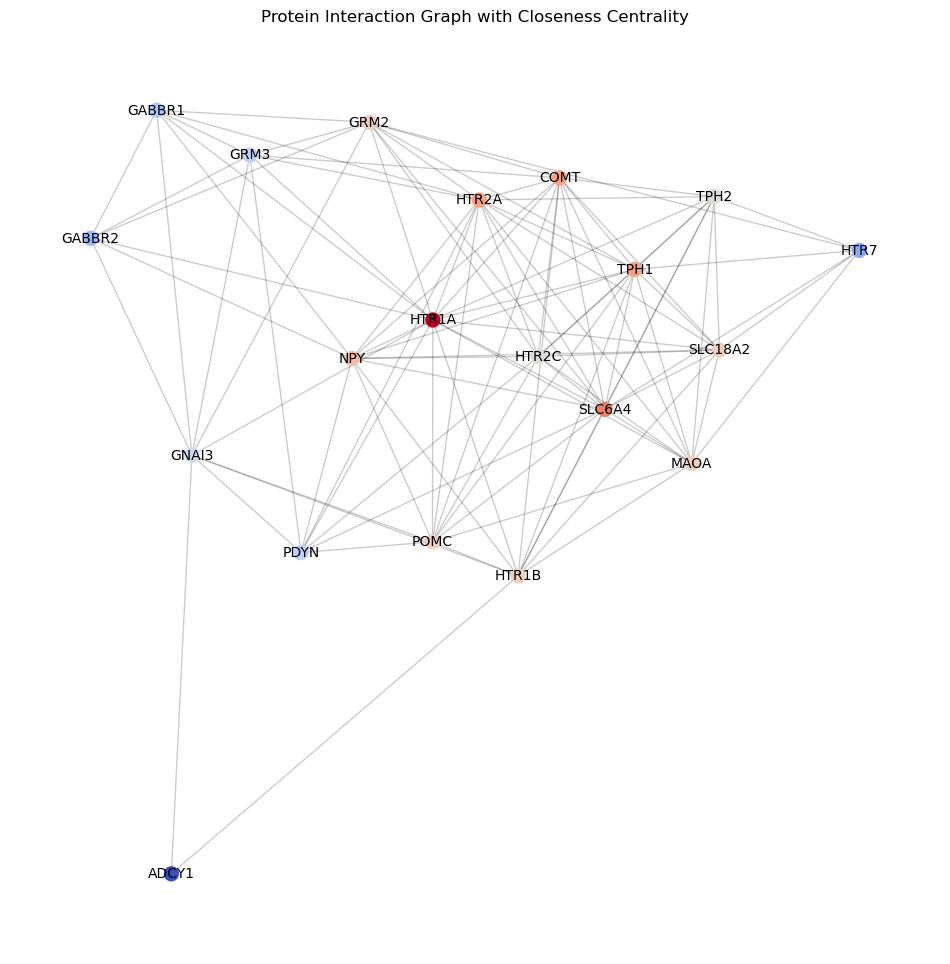

In [16]:
# Create a list of node colors based on their closeness centrality
colors = [cc[node] for node in G.nodes()]

# Draw the graph using spring layout and node colors based on their closeness centrality
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, k=0.5, iterations=50)
nx.draw_networkx_edges(G, pos, alpha=0.2)
nx.draw_networkx_nodes(G, pos, node_size=100, node_color=colors, cmap='coolwarm')
nx.draw_networkx_labels(G, pos, font_size=10, font_family='sans-serif')
plt.axis('off')
plt.title('Protein Interaction Graph with Closeness Centrality')
plt.show()

## Results
The nodes with the highest closeness centrality values are HTR1A with a value of 0.8636, followed by TPH1, COMT, and HTR2A with values of 0.76. These nodes are, therefore, the most central nodes in the graph according to this metric.

On the other hand, the nodes with the lowest closeness centrality values are ADCY1 with a value of 0.4872, followed by GABBR2 and HTR7 with values of 0.5938 and 0.5758 respectively. These nodes are, therefore, the least central nodes in the graph according to this metric.
# Information Centrality 
The information centrality is a measure that quantifies the influence of a node in a network based on the amount of information that passes through it. In a PPIN, this could be interpreted as the ability of a protein to transmit or receive signals from other proteins in the network.

In [17]:
ic=nx.information_centrality(G)
ic

{'TPH1': 0.25771408969401544,
 'GRM2': 0.24273910981709543,
 'POMC': 0.24262951152255355,
 'NPY': 0.2520359102508227,
 'COMT': 0.25923560573428145,
 'HTR1B': 0.24247387514295918,
 'SLC18A2': 0.23985957238183342,
 'HTR7': 0.17606950825532128,
 'HTR2C': 0.24079788915620837,
 'HTR2A': 0.26703918662210296,
 'TPH2': 0.2295709782413227,
 'MAOA': 0.23962445762083195,
 'HTR1A': 0.2818310208216443,
 'SLC6A4': 0.2656887823551924,
 'GABBR2': 0.17474675639265833,
 'GRM3': 0.20589875536980912,
 'GNAI3': 0.2178370437809367,
 'GABBR1': 0.1913442186746074,
 'PDYN': 0.2089063433888906,
 'ADCY1': 0.08098293093490967}

## Lets Visualize using Information Centrality
The nodes with higher information centrality are colored with warmer colors (e.g., red), while nodes with lower information centrality are colored with cooler colors (e.g., blue).We find that visualization correlates with the results above. 

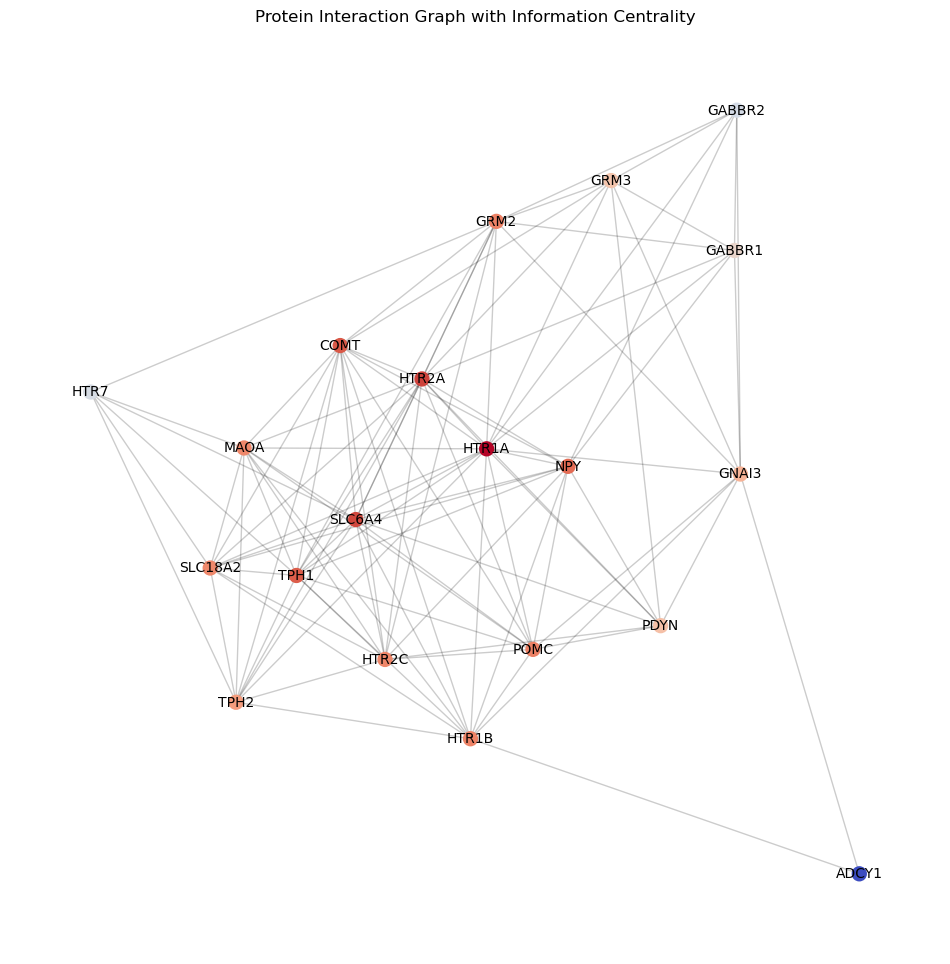

In [18]:
# Create a list of node colors based on their information centrality
colors = [ic[node] for node in G.nodes()]

# Draw the graph using spring layout and node colors based on their information centrality
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, k=0.5, iterations=50)
nx.draw_networkx_edges(G, pos, alpha=0.2)
nx.draw_networkx_nodes(G, pos, node_size=100, node_color=colors, cmap='coolwarm')
nx.draw_networkx_labels(G, pos, font_size=10, font_family='sans-serif')
plt.axis('off')
plt.title('Protein Interaction Graph with Information Centrality')
plt.show()

## Results
TPH1, COMT, and HTR1A have relatively high information centrality values, suggesting that they are important in the flow of information in the PPIN. On the other hand, TPH2, ADCY1,GABBR2 has a low information centrality value, indicating that it may have less influence in the flow of information in the network.
# Betweenness Centrality 
Betweenness centrality is a measure of the importance of a node in a network based on the number of shortest paths that pass through it.Therefore, a node with high betweenness centrality is important in maintaining the connectivity of the network. Nodes with high betweenness centrality may be bottlenecks or bridges that connect different parts of the network. In contrast, nodes with low betweenness centrality are less important for maintaining the overall connectivity of the network.

In [19]:
bc= nx.betweenness_centrality(G)
bc

{'TPH1': 0.020779220779220776,
 'GRM2': 0.056034024455077075,
 'POMC': 0.018203547589512502,
 'NPY': 0.03794481996236382,
 'COMT': 0.02487278803068277,
 'HTR1B': 0.07475338177092564,
 'SLC18A2': 0.012206863961249927,
 'HTR7': 0.0025062656641604004,
 'HTR2C': 0.013420124385036666,
 'HTR2A': 0.042509261368910485,
 'TPH2': 0.008876779490814578,
 'MAOA': 0.012206863961249927,
 'HTR1A': 0.086292119186856,
 'SLC6A4': 0.03438267385635806,
 'GABBR2': 0.002680311890838206,
 'GRM3': 0.010776942355889723,
 'GNAI3': 0.05720614667983088,
 'GABBR1': 0.005214424951267056,
 'PDYN': 0.011297182349813929,
 'ADCY1': 0.0}

## Lets Visualize using Betweenness Centrality
The nodes with higher betweenness centrality are colored with warmer colors (e.g., red), while nodes with lower betweenness centrality are colored with cooler colors (e.g., blue).The visualization also correlates with the results above. 

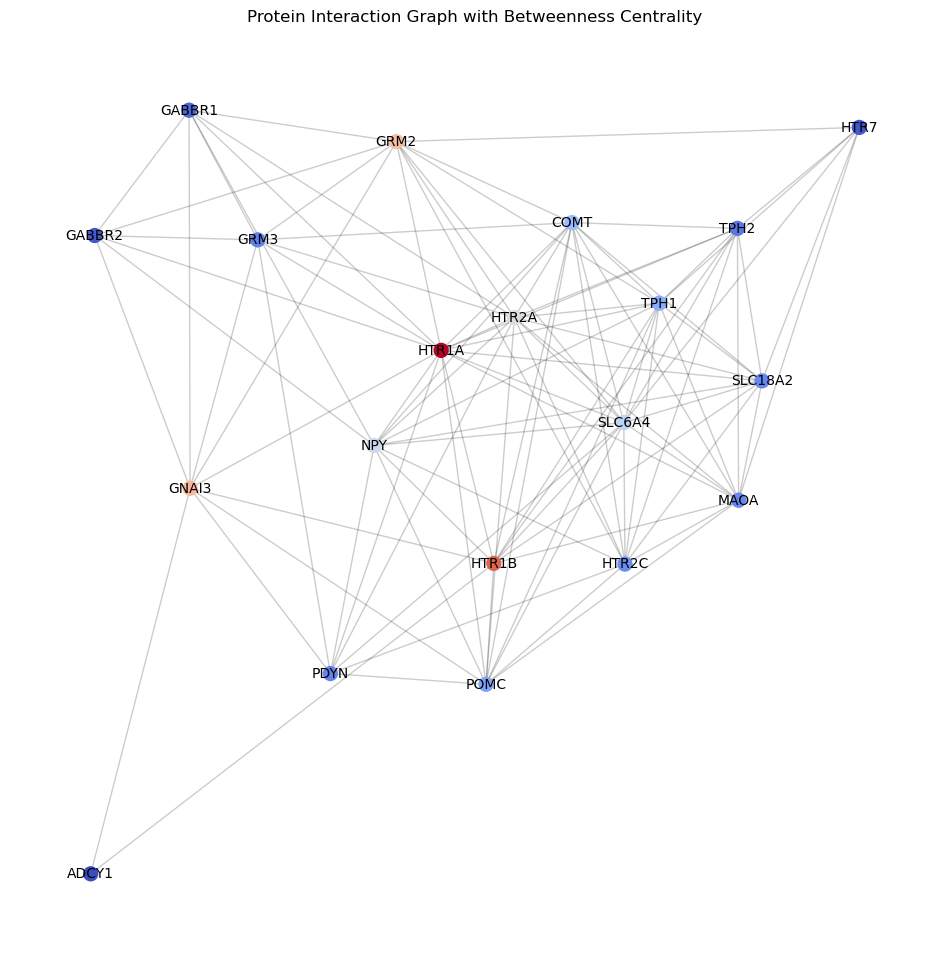

In [20]:
# Create a list of node colors based on their Betweenness centrality
colors = [bc[node] for node in G.nodes()]

# Draw the graph using spring layout and node colors based on their Betweenness centrality
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, k=0.5, iterations=50)
nx.draw_networkx_edges(G, pos, alpha=0.2)
nx.draw_networkx_nodes(G, pos, node_size=100, node_color=colors, cmap='coolwarm')
nx.draw_networkx_labels(G, pos, font_size=10, font_family='sans-serif')
plt.axis('off')
plt.title('Protein Interaction Graph with Betweenness Centrality')
plt.show()

## Result
In the given result, some nodes have relatively high betweenness centrality, such as 'HTR1A', 'HTR1B', 'GRM2', 'GNAI3', and 'HTR2A', which suggests that these nodes are important for maintaining the connectivity of the network. On the other hand, some nodes have low betweenness centrality, such as 'ADCY1','GABBR2' which suggests that these nodes are less important for maintaining the overall connectivity of the network.
# Current Flow Betweeenness Centrality
In network analysis, current flow betweenness centrality is a measure of a node's importance in a graph based on the current flow between all pairs of nodes. The current flow betweenness centrality of a node is calculated as the sum of the current flows between all pairs of nodes passing through that node.The nodes with higher current flow betweenness centrality values are considered to be more important in the graph, as they play a crucial role in the flow of current between nodes in the network.

In [21]:
cfb=nx.current_flow_betweenness_centrality(G)
cfb

{'TPH1': 0.09784759638132813,
 'GRM2': 0.11913339131788271,
 'POMC': 0.0902553626769112,
 'NPY': 0.10970502596731116,
 'COMT': 0.1003450850092519,
 'HTR1B': 0.13366798665875776,
 'SLC18A2': 0.08188715213304418,
 'HTR7': 0.04575447508963524,
 'HTR2C': 0.08268427033349803,
 'HTR2A': 0.12062502448403173,
 'TPH2': 0.07454233367864899,
 'MAOA': 0.08190140069108316,
 'HTR1A': 0.156403944845803,
 'SLC6A4': 0.109581650269469,
 'GABBR2': 0.05608613934229247,
 'GRM3': 0.0795443938460379,
 'GNAI3': 0.1330517946769151,
 'GABBR1': 0.06561932082722592,
 'PDYN': 0.07173962092023346,
 'ADCY1': 0.017477351800203596}

## Lets Visualize using Current Flow Betweenness Centrality
The nodes with higher current flow betweenness centrality are colored with warmer colors (e.g., red), while nodes with lower current flow betweenness centrality are colored with cooler colors (e.g., blue).

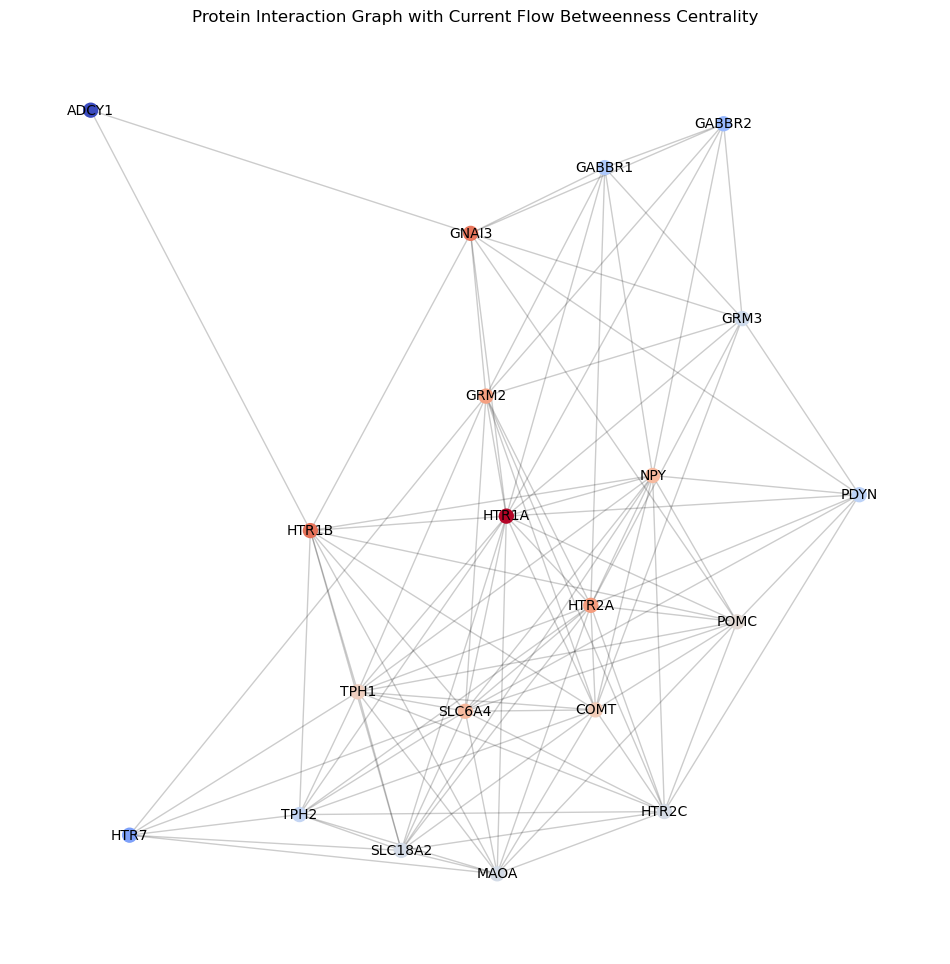

In [22]:
# Create a list of node colors based on their current flow betweenness centrality
colors = [cfb[node] for node in G.nodes()]

# Draw the graph using spring layout and node colors based on their current flow betweenness centrality
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, k=0.5, iterations=50)
nx.draw_networkx_edges(G, pos, alpha=0.2)
nx.draw_networkx_nodes(G, pos, node_size=100, node_color=colors, cmap='coolwarm')
nx.draw_networkx_labels(G, pos, font_size=10, font_family='sans-serif')
plt.axis('off')
plt.title('Protein Interaction Graph with Current Flow Betweenness Centrality')
plt.show()

## Results
In this specific result, the nodes with the highest current flow betweenness centrality are HTR1A, HTR1B, GRM2, and HTR2A, which indicates that these nodes are particularly important for maintaining the connectivity and information flow in the network. These nodes may be potential targets for interventions to modulate the network's function or prevent the spread of information through the network.

On the other hand, nodes with low current flow betweenness centrality, such as ADCY1,HTR7 may have a smaller impact on the network's overall connectivity and function.



# Communicability Betweenness Centrality
The score for each node indicates the extent to which that node mediates communication between other nodes in the network. A higher score indicates that the node is more important for communication between other nodes.

In [23]:
cbc=nx.communicability_betweenness_centrality(G)
cbc

{'TPH1': 0.5698849949634691,
 'GRM2': 0.3889466681750112,
 'POMC': 0.4606616767656639,
 'NPY': 0.4914075522069136,
 'COMT': 0.5773710055231562,
 'HTR1B': 0.44573042879426406,
 'SLC18A2': 0.4590420486272061,
 'HTR7': 0.15477426051388665,
 'HTR2C': 0.4477395686783021,
 'HTR2A': 0.6020939691811765,
 'TPH2': 0.39889197253915615,
 'MAOA': 0.4564653555593559,
 'HTR1A': 0.6761591097089741,
 'SLC6A4': 0.6127586597088254,
 'GABBR2': 0.11988508187534756,
 'GRM3': 0.21349601436438598,
 'GNAI3': 0.23135110669062806,
 'GABBR1': 0.17165794877812393,
 'PDYN': 0.2606156834841215,
 'ADCY1': 0.012435773325946016}

## Lets Visualize using Communicability Betweenness Centrality
The nodes with higher  Communicability Betweenness Centrality are colored with warmer colors (e.g., red), while nodes with lower Communicability Betweenness Centrality are colored with cooler colors (e.g., blue).

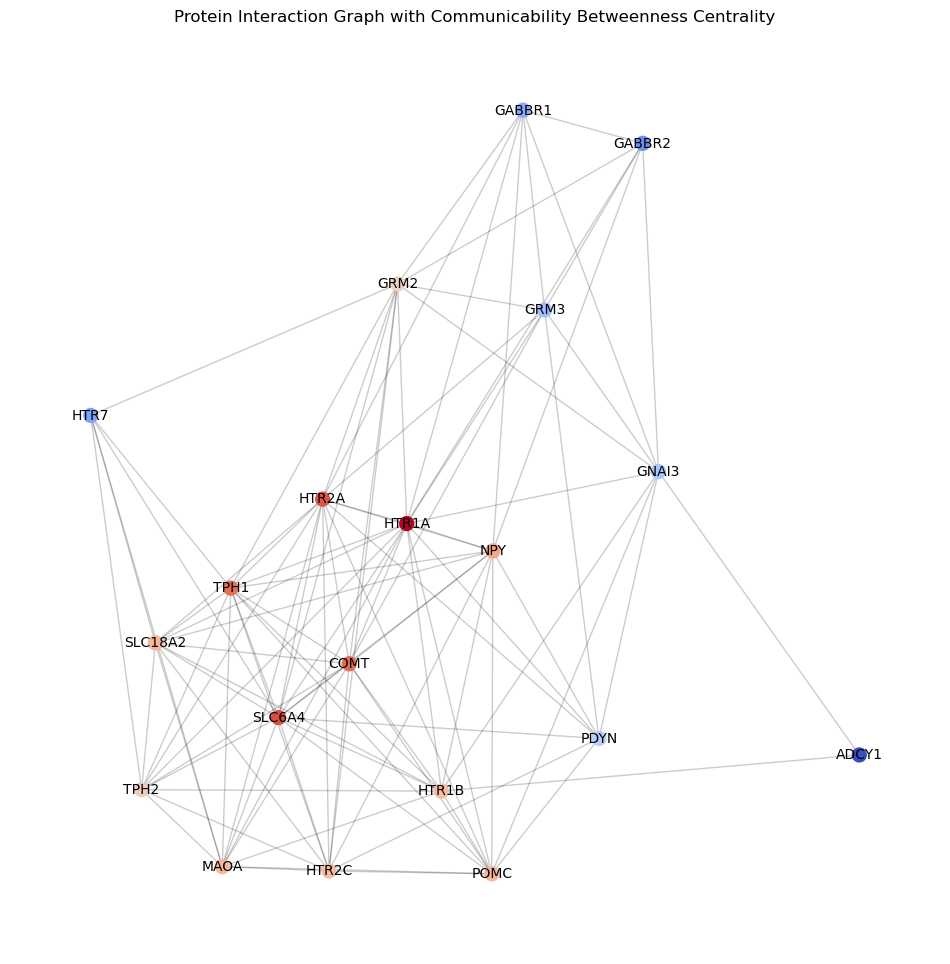

In [24]:
# Create a list of node colors based on their Communicability Betweenness Centrality
colors = [cbc[node] for node in G.nodes()]

# Draw the graph using spring layout and node colors based on their  Communicability Betweenness Centrality
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, k=0.5, iterations=50)
nx.draw_networkx_edges(G, pos, alpha=0.2)
nx.draw_networkx_nodes(G, pos, node_size=100, node_color=colors, cmap='coolwarm')
nx.draw_networkx_labels(G, pos, font_size=10, font_family='sans-serif')
plt.axis('off')
plt.title('Protein Interaction Graph with Communicability Betweenness Centrality')
plt.show()

## Results
The node 'HTR1A' has the highest score of 0.676, indicating that it is more important for communication between other nodes than any other node in the network. On the other hand, the node 'GABBR2' has a score of 0.119, which suggests that it is a relatively peripheral node in terms of communication flow in the network.
# Load Centrality 
Load centrality measures the importance of a node based on the number of shortest paths that pass through it. In this case, the higher the load centrality value of a node, the more important it is in maintaining the network's connectivity.

In [25]:
lc=nx.load_centrality(G)
lc

{'TPH1': 0.02052530396828642,
 'GRM2': 0.057335500756553394,
 'POMC': 0.017954061046166307,
 'NPY': 0.03788583492530861,
 'COMT': 0.02481380299362755,
 'HTR1B': 0.07293322337181987,
 'SLC18A2': 0.011952947150315573,
 'HTR7': 0.0025062656641603996,
 'HTR2C': 0.01342012438503666,
 'HTR2A': 0.042509261368910485,
 'TPH2': 0.008622862679880225,
 'MAOA': 0.011952947150315573,
 'HTR1A': 0.08614342123114052,
 'SLC6A4': 0.03412875704542371,
 'GABBR2': 0.0026803118908382073,
 'GRM3': 0.01085566480303322,
 'GNAI3': 0.05902630507893666,
 'GABBR1': 0.005293147398410557,
 'PDYN': 0.011623999781894517,
 'ADCY1': 0.0}

## Lets Visualize using Load Centrality
The nodes with higher Load centrality are colored with warmer colors (e.g., red), while nodes with lower Load centrality are colored with cooler colors (e.g., blue).

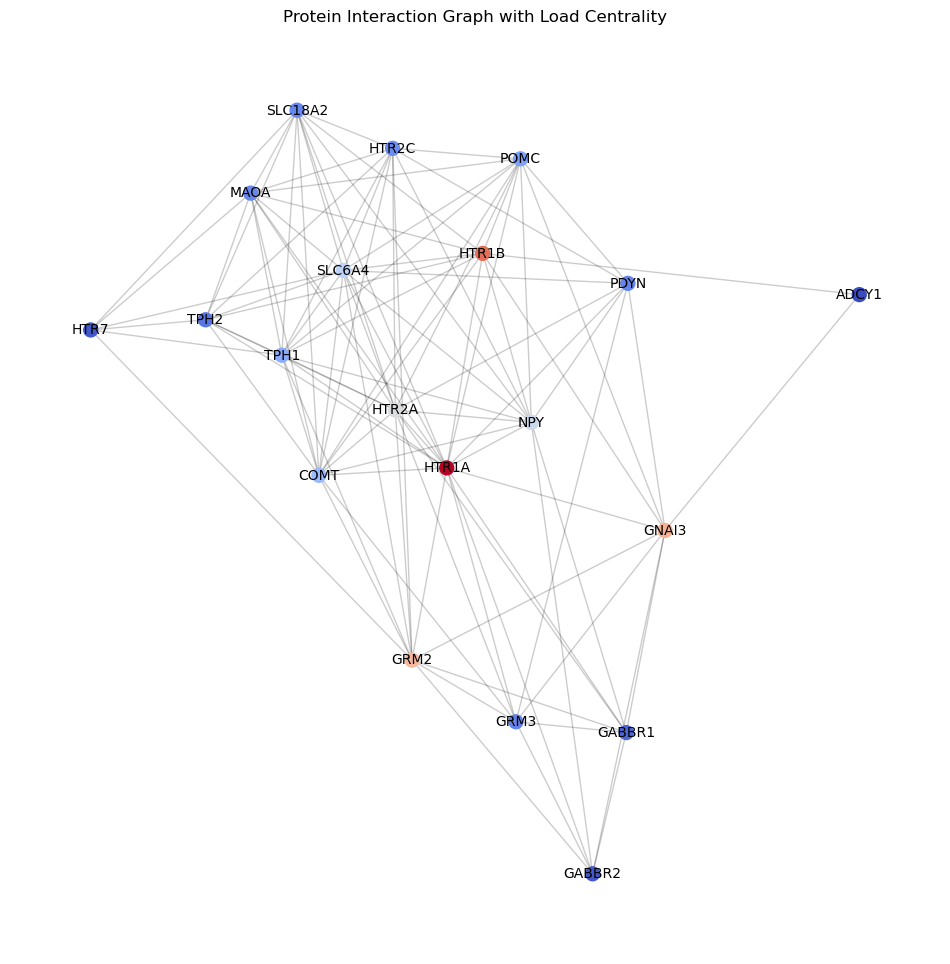

In [26]:
# Create a list of node colors based on their Load Centrality
colors = [lc[node] for node in G.nodes()]

# Draw the graph using spring layout and node colors based on their Load Centrality
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, k=0.5, iterations=50)
nx.draw_networkx_edges(G, pos, alpha=0.2)
nx.draw_networkx_nodes(G, pos, node_size=100, node_color=colors, cmap='coolwarm')
nx.draw_networkx_labels(G, pos, font_size=10, font_family='sans-serif')
plt.axis('off')
plt.title('Protein Interaction Graph with Load Centrality')
plt.show()

## Results
The nodes "HTR1A" and "HTR1B" have the highest load centrality values of 0.086 and 0.073, respectively, suggesting that these nodes are critical for the network's connectivity. Other nodes with relatively high load centrality values include "GRM2," "GNAI3," "HTR2A," and "NPY," indicating that these nodes are also important in maintaining network connectivity.

On the other hand, some nodes have lower load centrality values, such as "ADCY1" with a value of 0.0, which suggests that these nodes may be less important in maintaining network connectivity.



# Subgraph Centrality 
Subgraph centrality measures the importance of a node based on its participation in all the subgraphs of the network. In other words, it reflects how many closed paths, or cycles, a node participates in.

In [27]:
sc= nx.subgraph_centrality(G)
sc

{'TPH1': 6547.331485737759,
 'GRM2': 3543.6937712228487,
 'POMC': 4779.163133892626,
 'NPY': 5086.242283841012,
 'COMT': 6585.960564709947,
 'HTR1B': 4170.128919817259,
 'SLC18A2': 4966.597679662251,
 'HTR7': 1456.7899583114404,
 'HTR2C': 4808.041654195403,
 'HTR2A': 6855.8806068799895,
 'TPH2': 4184.09342908091,
 'MAOA': 4941.9891390415405,
 'HTR1A': 7753.328762478141,
 'SLC6A4': 7197.638698201781,
 'GABBR2': 896.3671648250843,
 'GRM3': 1710.1378744910155,
 'GNAI3': 1572.717102609662,
 'GABBR1': 1342.4405299840837,
 'PDYN': 2340.523180922011,
 'ADCY1': 87.34908518075349}

## Lets Visualize using Subgraph Centrality
The nodes with higher Subgraph Centrality are colored with warmer colors (e.g., red), while nodes with lower Subgraph Centrality are colored with cooler colors (e.g., blue).

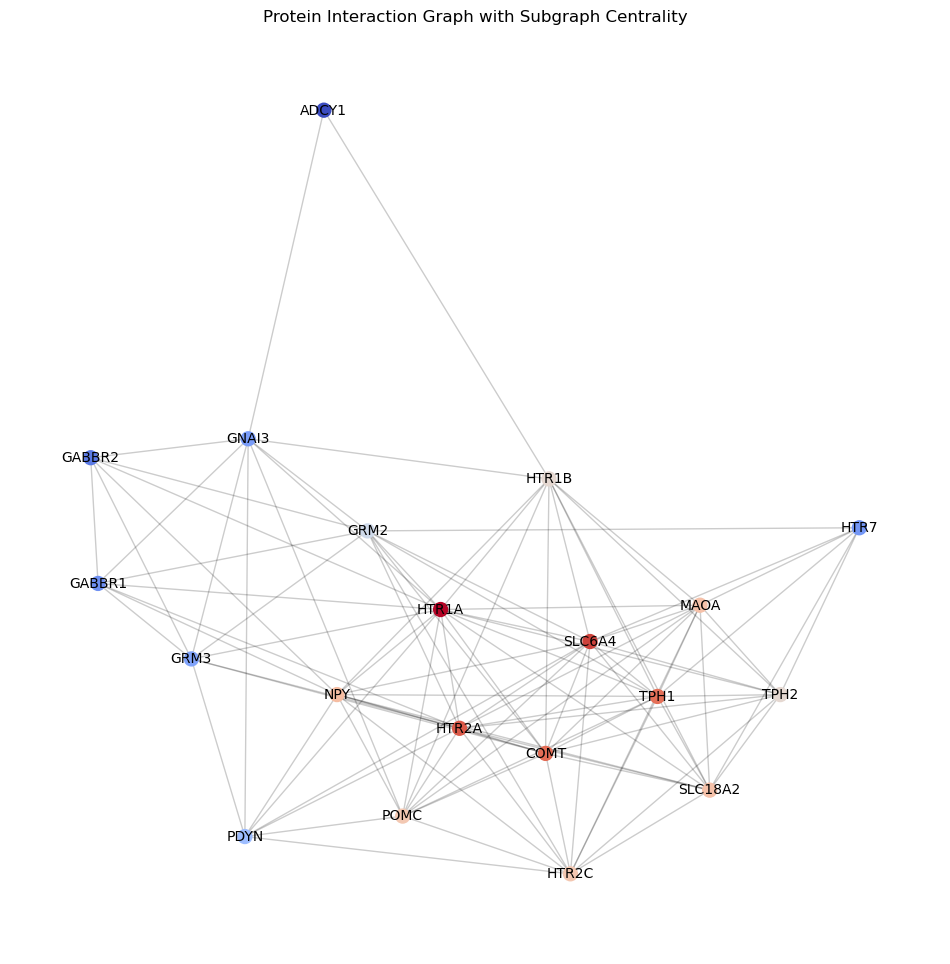

In [28]:
# Create a list of node colors based on their Subgraph Centrality
colors = [sc[node] for node in G.nodes()]

# Draw the graph using spring layout and node colors based on their Subgraph Centrality
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, k=0.5, iterations=50)
nx.draw_networkx_edges(G, pos, alpha=0.2)
nx.draw_networkx_nodes(G, pos, node_size=100, node_color=colors, cmap='coolwarm')
nx.draw_networkx_labels(G, pos, font_size=10, font_family='sans-serif')
plt.axis('off')
plt.title('Protein Interaction Graph with Subgraph Centrality')
plt.show()

## Results
The nodes "HTR1A," "HTR2A," and "COMT" have the highest subgraph centrality values of 7753, 6855, and 6585, respectively, indicating that these nodes are the most important in terms of their participation in the subgraphs of the network. Other nodes with relatively high subgraph centrality values include "SLC6A4," "TPH1," "NPY," "HTR2C," and "TPH2," suggesting that these nodes are also important in participating in the subgraphs of the network.

On the other hand, some nodes have lower subgraph centrality values, such as "ADCY1" with a value of 87.3, which suggests that these nodes participate in fewer subgraphs and may be less important in terms of their contribution to the overall network structure.

# Estrada Index 
The Estrada index is a measure of the graph complexity that takes into account the contribution of all nodes and their interactions. It is calculated by exponentiating the adjacency matrix of the network and summing all of its elements.

A higher Estrada index value suggests a higher level of complexity and a greater number of interactions between nodes in the network. In other words, the more interactions and interdependencies between nodes, the higher the Estrada index value.

In [29]:
nx.estrada_index(G)

80826.41502508555

## Results
The Estrada index value of 80826.4 indicates that the ppin network is relatively complex and has many interactions between its nodes. This suggests that the network may be biologically important, as biological systems are often characterized by complex interactions between their components.
# Harmonic Centrality
The harmonic centrality measures the sum of the inverse of the shortest path lengths between a node and all other nodes in the network. A higher harmonic centrality value suggests that a node is more centrally located within the network and has more influence over the flow of information within the network.

In [30]:
hc=nx.harmonic_centrality(G)
hc

{'HTR2C': 14.833333333333334,
 'GABBR2': 12.5,
 'TPH2': 14.5,
 'POMC': 15.0,
 'GNAI3': 14.0,
 'SLC18A2': 15.0,
 'GRM2': 15.0,
 'NPY': 15.5,
 'HTR1A': 17.5,
 'ADCY1': 10.0,
 'MAOA': 15.0,
 'GRM3': 13.5,
 'GABBR1': 13.0,
 'TPH1': 16.0,
 'COMT': 16.0,
 'PDYN': 13.5,
 'HTR1B': 15.0,
 'SLC6A4': 16.5,
 'HTR2A': 16.333333333333332,
 'HTR7': 12.333333333333334}

## Lets Visualize using Harmonic Centrality
The nodes with higher harmonic centrality are colored with warmer colors (e.g., red), while nodes with lower Harmonic Centrality are colored with cooler colors (e.g., blue).

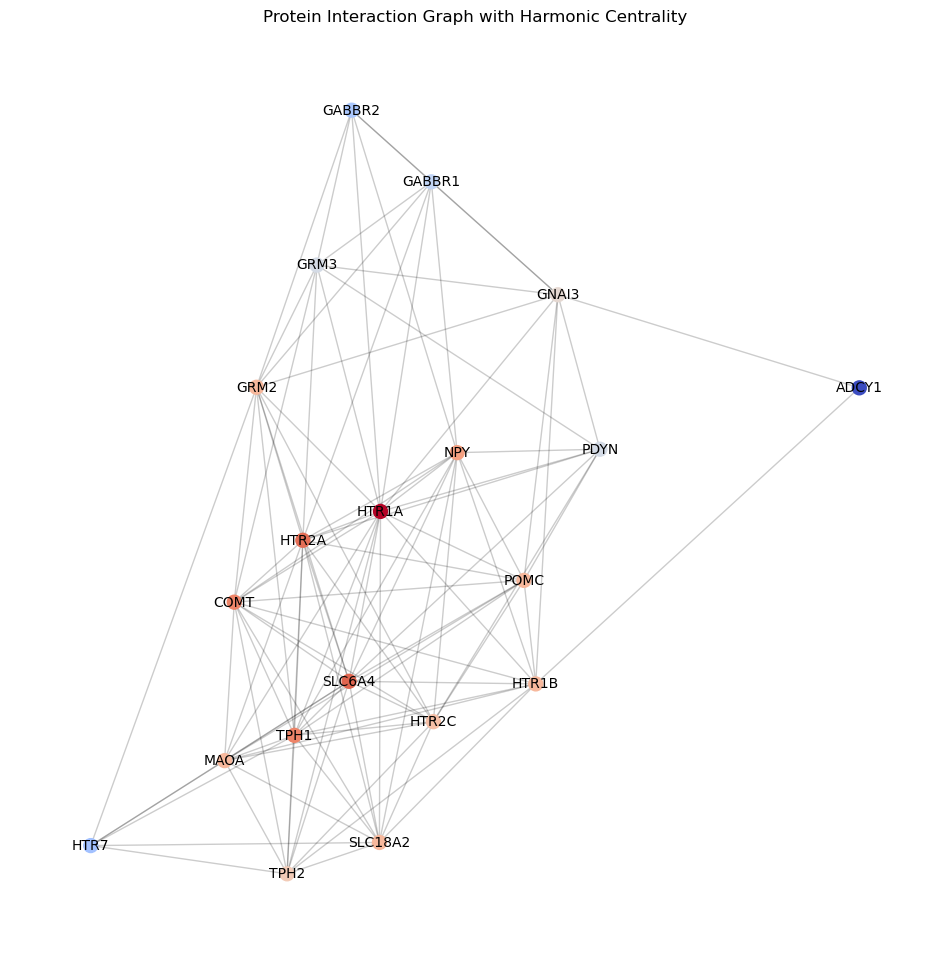

In [31]:
# Create a list of node colors based on their Harmonic Centrality
colors = [hc[node] for node in G.nodes()]

# Draw the graph using spring layout and node colors based on their Harmonic Centrality
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, k=0.5, iterations=50)
nx.draw_networkx_edges(G, pos, alpha=0.2)
nx.draw_networkx_nodes(G, pos, node_size=100, node_color=colors, cmap='coolwarm')
nx.draw_networkx_labels(G, pos, font_size=10, font_family='sans-serif')
plt.axis('off')
plt.title('Protein Interaction Graph with Harmonic Centrality')
plt.show()

## Results
The nodes with the highest harmonic centrality values are HTR1A (17.5), COMT (16.0), and TPH1 (16.0), indicating that these nodes are more central and influential in the network. The nodes with the lowest harmonic centrality values are ADCY1 (10.0), GABBR2 (12.5), and HTR7 (12.3), indicating that these nodes are less central and influential in the network.
# Second Order Centrality 
The second-order centrality measures the influence of a node based on its indirect connections, which means how many nodes are reachable through a node's immediate neighbors.

In [32]:
soc=nx.second_order_centrality(G)
soc

{'TPH1': 24.100580061483818,
 'GRM2': 29.405812334611124,
 'POMC': 29.616953581343676,
 'NPY': 26.206467520097306,
 'COMT': 25.27765026193676,
 'HTR1B': 28.216430881849035,
 'SLC18A2': 29.035805217230735,
 'HTR7': 45.558460098895644,
 'HTR2C': 28.382834784489948,
 'HTR2A': 22.17688046245593,
 'TPH2': 30.01516328603432,
 'MAOA': 26.918919463715525,
 'HTR1A': 19.176315819372512,
 'SLC6A4': 20.672655137269295,
 'GABBR2': 40.59021960028761,
 'GRM3': 34.25577310613362,
 'GNAI3': 31.03557541030946,
 'GABBR1': 37.50286895572358,
 'PDYN': 37.27492579904902,
 'ADCY1': 73.87667205703221}

## Lets Visualize using Second Order Centrality
The nodes with higher Second Order centrality are colored with warmer colors (e.g., red), while nodes with lower Second Order Centrality are colored with cooler colors (e.g., blue).

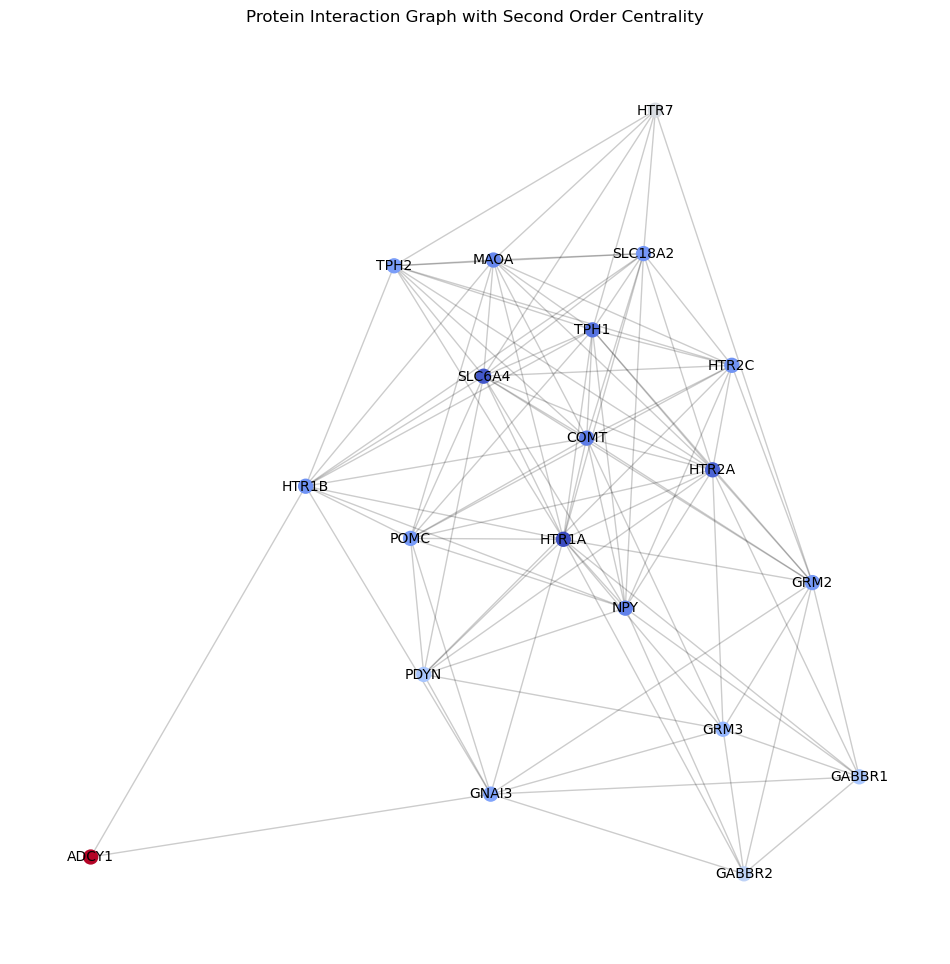

In [33]:
# Create a list of node colors based on their Second Order Centrality
colors = [soc[node] for node in G.nodes()]

# Draw the graph using spring layout and node colors based on their Second Order Centrality
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, k=0.5, iterations=50)
nx.draw_networkx_edges(G, pos, alpha=0.2)
nx.draw_networkx_nodes(G, pos, node_size=100, node_color=colors, cmap='coolwarm')
nx.draw_networkx_labels(G, pos, font_size=10, font_family='sans-serif')
plt.axis('off')
plt.title('Protein Interaction Graph with Second Order Centrality')
plt.show()

## Results
The node with the highest second-order centrality is ADCY1 with a value of 73.88, which means that it can reach a lot of nodes indirectly through its neighbors. The next highest values are for HTR7 and GABBR2, which also have high values, indicating their indirect influence on the network. On the other hand, HTR1A and HTR2A have low second-order centrality values, indicating their limited indirect influence on the network.
# Voterank 
The nx.voterank(G) function returns a list of nodes ranked by their influence in the network using a voter model approach. In this case, the nodes are ordered from most to least influential.

In [34]:
nx.voterank(G)

['HTR1A',
 'SLC6A4',
 'HTR2A',
 'TPH1',
 'GNAI3',
 'COMT',
 'NPY',
 'GRM2',
 'MAOA',
 'HTR1B',
 'GRM3',
 'SLC18A2',
 'HTR2C',
 'TPH2',
 'GABBR1',
 'POMC']

## Results
The most influential node in the network is HTR1A, followed by SLC6A4 and HTR2A. These nodes have the highest degree and centrality measures in the network. Other highly influential nodes include TPH1, GNAI3, COMT, NPY, GRM2, MAOA, and HTR1B.

## Conclusion 
In conclusion, the use of NetworkX and centrality measures provides a powerful and flexible framework for analyzing protein-protein interaction networks (PPINs). NetworkX offers a range of functions and tools for constructing and visualizing networks, computing different centrality measures, and analyzing network properties and structures.

Through the use of NetworkX and centrality measures, we can gain a deeper understanding of the complex organization and function of PPINs. For instance, by analyzing the degree, betweenness, closeness, and eigenvector centrality measures of nodes in a PPIN, we can identify hub proteins, bottlenecks, and other types of important nodes that play critical roles in maintaining the network's stability and function.

Moreover, NetworkX allows us to easily visualize and interpret the results of our analyses, making it easier to communicate our findings to other researchers and stakeholders. With these capabilities, NetworkX and centrality measures offer a powerful and valuable toolset for studying PPINs and other types of complex networks.

We have looked through various centrality measures applied on String Dataset using NetworkX library. Now it is ypur turn to play around with it. Choose different set of proteins available on the String Website and make your own networks. 